In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#train data
td=pd.read_csv('Doctors Consultation Fees Prediction.csv')
td

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
#test data
ted=pd.read_csv('doctor consulation test data')
ted

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


# ist we will handle train data 

In [4]:
# ist we will handle train data 
#checking data informatoon (data tyoes )
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
#Checking the null values
td.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

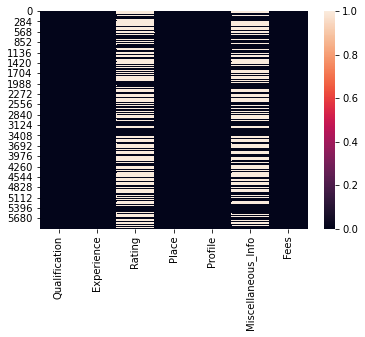

In [6]:
#plotting heat map
sns.heatmap(td.isnull())

In [7]:
# train data columns
td.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [8]:
#replacing the  string values form ('Experience') columns and change it as (int )type.
td['Experience']=td['Experience'].str.replace(' years experience','').astype(int)

In [9]:
td['Experience'].head()

0    24
1    12
2     9
3    12
4    20
Name: Experience, dtype: int32

In [10]:
#now we will handle ( 'Rating') column
td['Rating'].fillna('0%',inplace=True)

In [11]:
td['Experience'].head().isnull().sum()

0

In [12]:
#replacing the  string values form ( 'Rating') columns and change it as (int )type.
td['Rating']=td['Rating'].str.replace('%','').astype(int)

In [13]:
td['Rating'].head()

0    100
1     98
2      0
3      0
4    100
Name: Rating, dtype: int32

In [14]:
# now we will handle ('Miscellaneous_Info') column
td['Miscellaneous_Info'].fillna('Null',inplace=True)
td['Miscellaneous_Info'].isnull().sum()

0

In [15]:
td['Miscellaneous_Info']=td['Miscellaneous_Info'].str.replace('%','')

In [16]:
td['Miscellaneous_Info'].head()

0                  100 16 Feedback Kakkanad, Ernakulam
1                 98 76 Feedback Whitefield, Bangalore
2                                                 Null
3    Bannerghatta Road, Bangalore ?250 Available on...
4                 100 4 Feedback Keelkattalai, Chennai
Name: Miscellaneous_Info, dtype: object

In [17]:
#removing the nan value from ('Place') column
td['Place'].fillna('unknown',inplace=True)
td['Place'].isnull().sum()

0

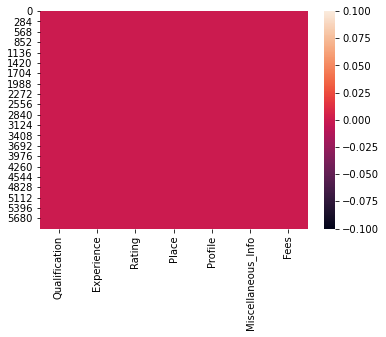

In [18]:
#heatmap after removing all the null values 
sns.heatmap(td.isnull())

In [19]:
# final train data
td

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,Null,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,"Basavanagudi, Bangalore",ENT Specialist,"98 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,0,"Nungambakkam, Chennai",General Medicine,Null,100
5958,MBBS,41,97,"Greater Kailash Part 2, Delhi",General Medicine,"97 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [20]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   int32 
 2   Rating              5961 non-null   int32 
 3   Place               5961 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  5961 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int32(2), int64(1), object(4)
memory usage: 279.5+ KB


In [21]:
td.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [22]:
td.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [23]:
#values counts
for i in td.columns:
    print(td[i].value_counts())


BDS                                                                                                         488
BHMS                                                                                                        477
BAMS                                                                                                        471
MBBS                                                                                                        334
MBBS, MS - ENT                                                                                              220
                                                                                                           ... 
BDS, Certificate of Oral Implantology, Certificate in Dental Implants                                         1
BDS, MDS - Conservative Dentistry & Endodontics, Certified in Pedodontics                                     1
MBBS, DNB - Otorhinolaryngology, Fellowship in Head & Neck Oncology Surgery                             

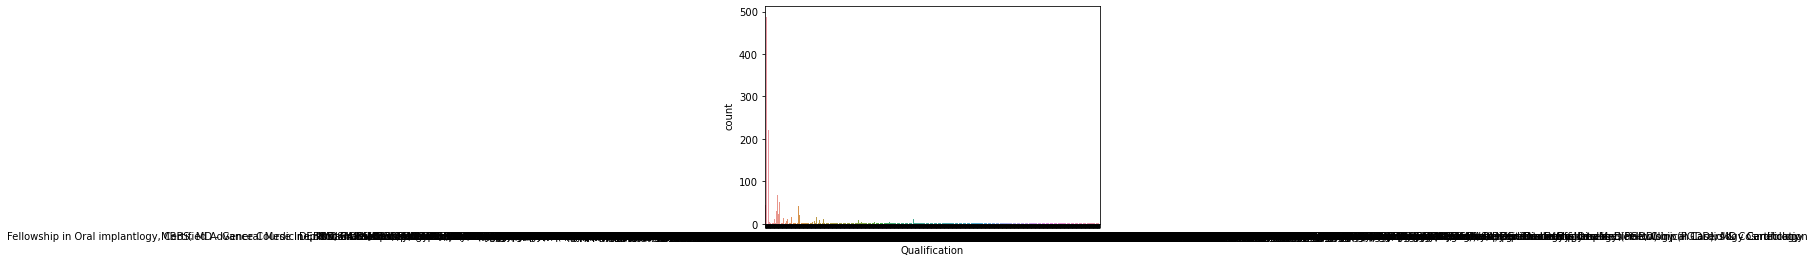

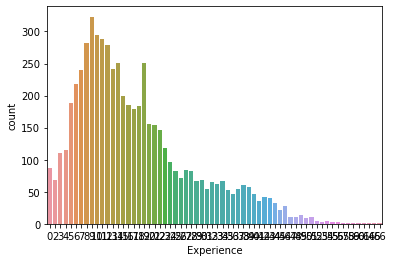

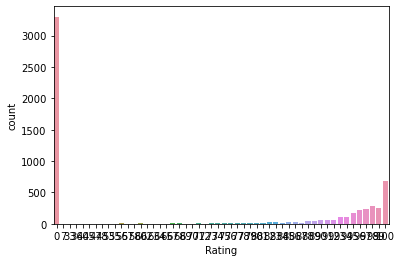

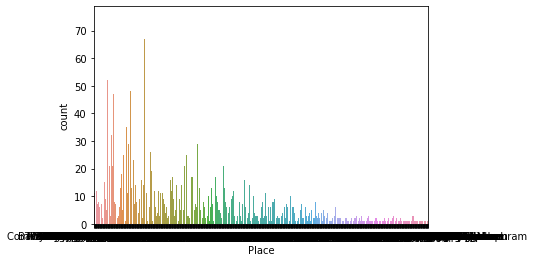

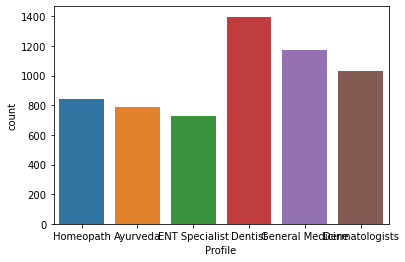

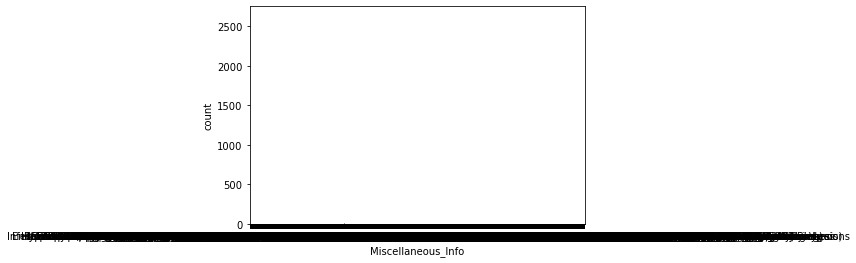

In [24]:
#datavisualization
c=['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info']
for i in c:
    plt.figure()
    sns.countplot(i,data=td)
    

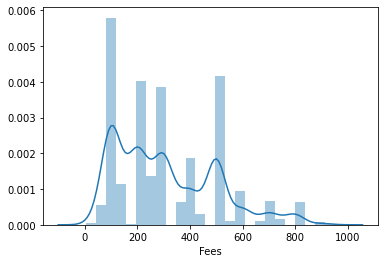

In [25]:
sns.distplot(td['Fees'])

In [26]:
#Encoding the the train data
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in td.columns:
    if td[i].dtypes=='object':
        td[i]=oe.fit_transform(td[i].values.reshape(-1,1))
    
td

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401.0,24,100,299.0,5.0,130.0,100
1,73.0,12,98,866.0,0.0,1422.0,350
2,1135.0,9,0,457.0,3.0,2504.0,300
3,464.0,12,0,68.0,0.0,1695.0,250
4,10.0,20,100,337.0,0.0,253.0,250
...,...,...,...,...,...,...,...
5956,1075.0,19,98,70.0,3.0,1385.0,300
5957,596.0,33,0,541.0,4.0,2504.0,100
5958,596.0,41,97,216.0,4.0,1173.0,600
5959,943.0,15,90,850.0,4.0,2202.0,100


In [27]:
#checking the correlation
td.corr()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
Qualification,1.000000,0.134697,0.023533,0.006321,0.393123,-0.117940,0.263214
Experience,0.134697,1.000000,-0.038569,0.000441,0.202073,-0.038540,0.002117
Rating,0.023533,-0.038569,1.000000,-0.045593,-0.126389,-0.612690,0.153273
Place,0.006321,0.000441,-0.045593,1.000000,0.016631,0.047163,-0.063510
Profile,0.393123,0.202073,-0.126389,0.016631,1.000000,-0.028414,0.145226
Miscellaneous_Info,-0.117940,-0.038540,-0.612690,0.047163,-0.028414,1.000000,-0.144610
Fees,0.263214,0.002117,0.153273,-0.063510,0.145226,-0.144610,1.000000


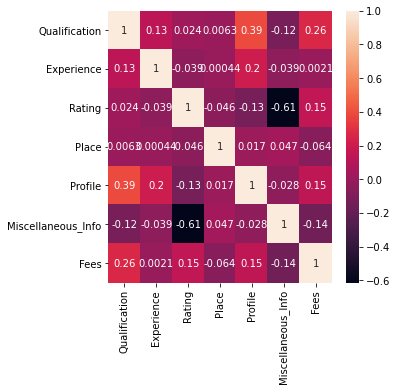

In [28]:
#plotting heatmaps
plt.figure(figsize=(5,5))
sns.heatmap(td.corr(),annot=True)

In [29]:
#correlation of all the columns with our traget column('Fees')
corr_matrix=td.corr()
corr_matrix[ 'Fees'].sort_values(ascending=False)

Fees                  1.000000
Qualification         0.263214
Rating                0.153273
Profile               0.145226
Experience            0.002117
Place                -0.063510
Miscellaneous_Info   -0.144610
Name: Fees, dtype: float64

In [30]:
#checking the statical summary
td.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,17.303976,42.217245,417.089918,2.441872,1972.967287,307.944640
std,413.842446,11.142798,47.340934,259.983793,1.658014,794.441634,190.920373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,9.000000,0.000000,197.000000,1.000000,1477.000000,150.000000
50%,596.000000,14.000000,0.000000,412.000000,2.000000,2504.000000,300.000000
75%,943.000000,23.000000,96.000000,632.000000,4.000000,2504.000000,500.000000
max,1419.000000,66.000000,100.000000,877.000000,5.000000,2998.000000,950.000000


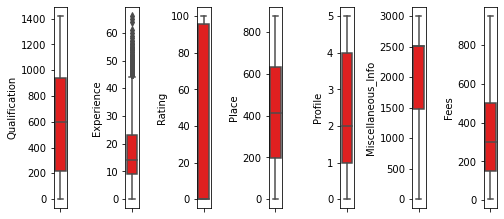

In [31]:
#checking the outlairs
collist=td.columns.values
ncol=30
nrow=15
plt.figure(figsize=(ncol,3*nrow))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(td[collist[i]],color='r',orient='v')
    plt.tight_layout()

#here we see there are no outlairs present except ('Experience Columns').lets handel this

In [32]:
#we will seprate the feature and target variable 
x=td.drop('Fees',axis=1)
y=td['Fees']

In [33]:
x.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401.0,24,100,299.0,5.0,130.0
1,73.0,12,98,866.0,0.0,1422.0
2,1135.0,9,0,457.0,3.0,2504.0
3,464.0,12,0,68.0,0.0,1695.0
4,10.0,20,100,337.0,0.0,253.0


In [34]:
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [35]:
x.shape

(5961, 6)

In [36]:
y=y.values.reshape(-1,1)

In [37]:
y.shape

(5961, 1)

In [38]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   float64
 1   Experience          5961 non-null   int32  
 2   Rating              5961 non-null   int32  
 3   Place               5961 non-null   float64
 4   Profile             5961 non-null   float64
 5   Miscellaneous_Info  5961 non-null   float64
dtypes: float64(4), int32(2)
memory usage: 233.0 KB


In [39]:
#checking the skewness
x.skew()

Qualification         0.239720
Experience            0.991089
Rating                0.247186
Place                 0.116574
Profile               0.108803
Miscellaneous_Info   -1.043599
dtype: float64

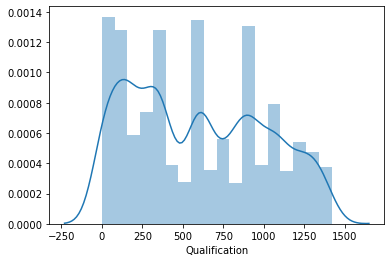

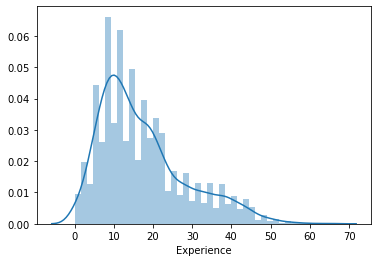

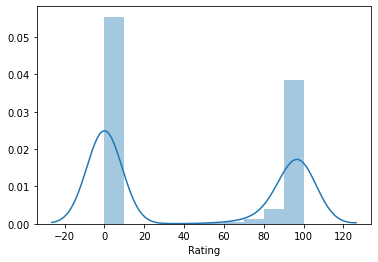

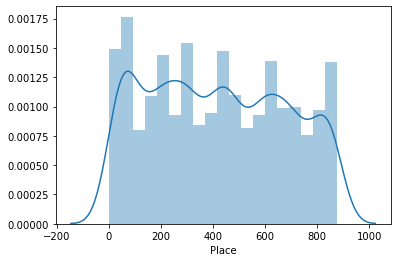

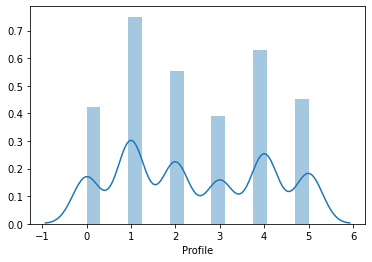

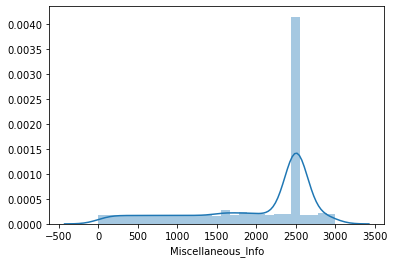

In [40]:
for i in x.columns:
    plt.figure()
    sns.distplot(x[i])

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [42]:
MaxR2=0
maxRs=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=i)
    Lr=LinearRegression()
    Lr.fit(x_train,y_train)
    pred=Lr.predict(x_test)
    r2score=r2_score(y_test, pred)
    if r2score>MaxR2:
        MaxR2=r2score
        maxRs=i
print('Best r2 score is',MaxR2,'on random state',maxRs)

Best r2 score is 0.1187257612226823 on random state 39


In [43]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=39)

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [45]:
#evaluate the performance of algorithm
print('mean absolute error=',mean_absolute_error(y_test,pred))
print('mean squared error=',mean_squared_error(y_test,pred))
print('Root mean_squared error=',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error= 167.21387929096164
mean squared error= 42126.94525242547
Root mean_squared error= 205.2484963463203


In [46]:
#Crossvalidation
from sklearn.model_selection import cross_val_score
Lr=LinearRegression()
cvr=cross_val_score(Lr,x,y,cv=5)

In [47]:
print('crossvalidation_score for LinearRegression is:',cvr.mean())

crossvalidation_score for LinearRegression is: 0.09807161351394515


In [61]:
#ensemble method
#ensemble method
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parametrs={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parametrs)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [62]:
rf=RandomForestRegressor(criterion= 'mse',max_features= 'auto' )
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rfs=r2_score(y_test,pred)
print('r2_score',rfs*100)


r2_score 15.71986400475508


In [63]:
#cross validation
cvr=cross_val_score(rf,x,y,cv=5)
print ('crossvalidation of the RandomforestRegression is',cvr.mean())

crossvalidation of the RandomforestRegression is 0.15876734754664984


In [65]:
import joblib
joblib.dump(rf,'Doctor consultation')

['Doctor consultation']

# 2ndly we will handle test data

In [82]:
ted

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241.0,28.0,0,"Ghatkopar East, Mumbai",General Medicine,null
1,340.0,24.0,0,"West Marredpally, Hyderabad",ENT Specialist,null
2,258.0,34.0,70,"KK Nagar, Chennai",Dermatologists,"70 4 Feedback KK Nagar, Chennai"
3,6.0,0.0,0,"New Ashok Nagar, Delhi",Ayurveda,null
4,79.0,7.0,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,17.0,1.0,0,"Basavanagudi, Bangalore",Ayurveda,null
1983,548.0,33.0,0,"Choolai, Chennai",Dermatologists,null
1984,474.0,56.0,0,"Porur, Chennai",General Medicine,null
1985,51.0,3.0,98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [67]:
#checking test data info
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       1987 non-null   float64
 1   Experience          1987 non-null   float64
 2   Rating              1987 non-null   int32  
 3   Place               1981 non-null   object 
 4   Profile             1987 non-null   object 
 5   Miscellaneous_Info  1987 non-null   object 
dtypes: float64(2), int32(1), object(3)
memory usage: 85.5+ KB


In [112]:
ted.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [69]:
#cheching the null values.
ted.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 6
Profile               0
Miscellaneous_Info    0
dtype: int64

In [70]:
# lets handle ('Rating') column
ted['Rating'].head()

0      0
1      0
2     70
3      0
4    100
Name: Rating, dtype: int32

In [85]:
# handle the nan values
ted['Rating'].fillna((0),inplace=True)
ted['Rating'].isnull().sum()

0

In [86]:
ted['Rating'].unique()

array([  0,  70, 100,  90,  94,  99,  98,  87,  64,  96,  95,  97,  93,
        69,  71,  83,  92,  80,  86,  88,  67,  85,  84,  55,  89,  82,
        81,  60,  73,  65,  77,  91,  78,  79,  76,  52,  53])

In [88]:
ted['Rating']=ted['Rating'].astype(int)

In [89]:
ted['Rating'].head()

0      0
1      0
2     70
3      0
4    100
Name: Rating, dtype: int32

In [90]:
#now we handle ('Miscellaneous_Info') column
# ist we handle nan values
ted['Miscellaneous_Info'].fillna(('null'),inplace=True)
ted['Miscellaneous_Info'].isnull().sum()

0

In [91]:
#now will replace % sign
ted['Miscellaneous_Info']=ted['Miscellaneous_Info'].str.replace('%','')

In [92]:
ted['Miscellaneous_Info'].head()

0                                                 null
1                                                 null
2                      70 4 Feedback KK Nagar, Chennai
3                                                 null
4    General Dentistry Conservative Dentistry Cosme...
Name: Miscellaneous_Info, dtype: object

In [93]:
ted.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 6
Profile               0
Miscellaneous_Info    0
dtype: int64

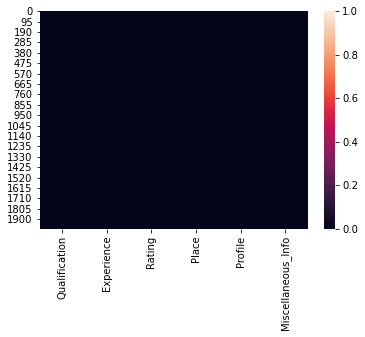

In [94]:
sns.heatmap(ted.isnull())

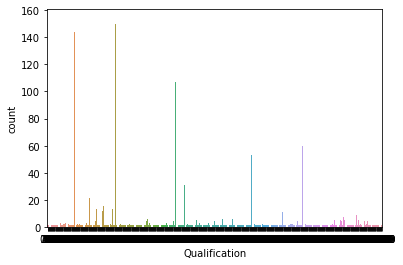

In [98]:
#visualisation of the test data
sns.countplot(ted['Qualification'],data=ted)

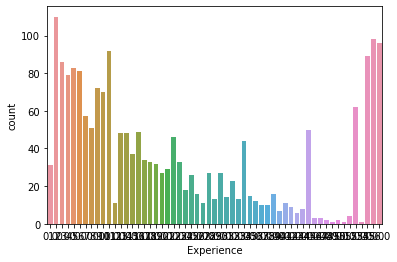

In [100]:
sns.countplot(ted['Experience'],data=ted)

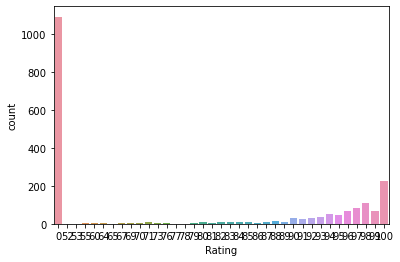

In [101]:
sns.countplot(ted['Rating'],data=ted)

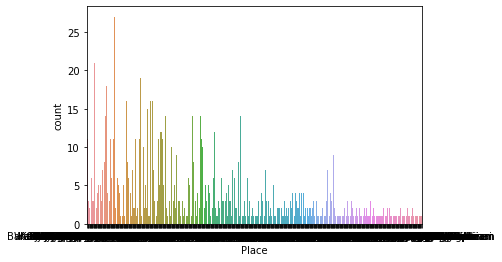

In [102]:
sns.countplot(ted['Place'],data=ted)

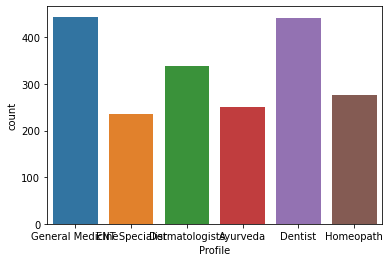

In [103]:
sns.countplot(ted['Profile'],data=ted)

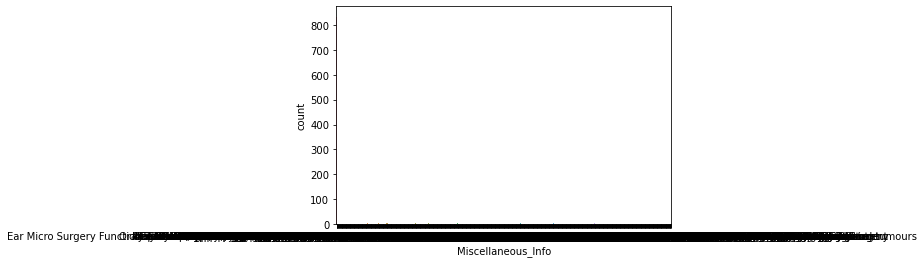

In [104]:
sns.countplot(ted['Miscellaneous_Info'],data=ted)

In [95]:
#final test data
ted.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241.0,28.0,0,"Ghatkopar East, Mumbai",General Medicine,null
1,340.0,24.0,0,"West Marredpally, Hyderabad",ENT Specialist,null
2,258.0,34.0,70,"KK Nagar, Chennai",Dermatologists,"70 4 Feedback KK Nagar, Chennai"
3,6.0,0.0,0,"New Ashok Nagar, Delhi",Ayurveda,null
4,79.0,7.0,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [114]:
ted['Place'].isnull().sum()

6

In [115]:
ted['Place'].fillna('Unknown',inplace=True)

In [116]:
ted.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

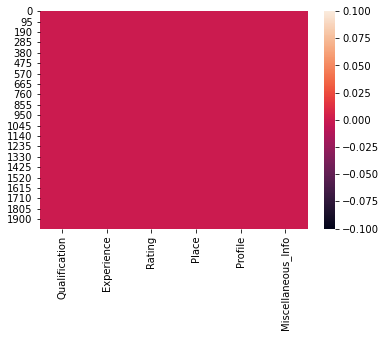

In [117]:
sns.heatmap(ted.isnull())

#now all the null values are removed

In [118]:
#chanding the object data into numric form
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in ted.columns:
    if ted[i].dtypes=='object':
        ted[i]=oe.fit_transform(ted[i].values.reshape(-1,1))
    
ted

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241.0,28.0,0,142.0,4.0,1084.0
1,340.0,24.0,0,581.0,3.0,1084.0
2,258.0,34.0,70,212.0,2.0,153.0
3,6.0,0.0,0,374.0,0.0,1084.0
4,79.0,7.0,100,231.0,1.0,816.0
...,...,...,...,...,...,...
1982,17.0,1.0,0,58.0,0.0,1084.0
1983,548.0,33.0,0,96.0,2.0,1084.0
1984,474.0,56.0,0,424.0,4.0,1084.0
1985,51.0,3.0,98,26.0,1.0,975.0


#now we will do the testing


# loading the model

In [120]:
model=joblib.load('Doctor consultation')
model

RandomForestRegressor()

In [121]:
model.predict(ted)

array([426.5, 399. , 325. , ..., 298.5, 195. , 332. ])